# Using groupby in Pandas
Use this method when you want to collapse a dataframe by a categorical column and run an aggregation. For example, if you had a list of alcohol consumption by country, and you wanted to know the average consumed **for each** continent. Let's look at that example.

#### Load python tools

In [1]:
import pandas as pd

#### Read sample dataset

In [2]:
df = pd.read_csv('https://bit.ly/drinksbycountry')

#### What's that dataframe look like? 

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
df.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


#### How many records, or countries? 

In [5]:
len(df)

193

#### How many countries in each continent? 

In [6]:
df.value_counts('continent')

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
dtype: int64

---

#### What's the average beer servings in all countries? 

In [7]:
df['beer_servings'].mean()

106.16062176165804

#### But what about **for each** continent? 

In [8]:
df.groupby(['continent'])['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

#### You're basically doing this, but **for each** continent

In [9]:
df[df['continent'] == 'Asia']['beer_servings'].mean()

37.04545454545455

#### Or ... 

In [10]:
df[df['continent'] == 'North America']['beer_servings'].mean()

145.43478260869566

#### Remember, you can filter a dataframe — in this case to see each country in Asia:

In [11]:
asia_df = df[df['continent'] == "Asia"]

#### Which countries consume the most beer? 

In [12]:
asia_df.sort_values('beer_servings', ascending=False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
141,Russian Federation,247,326,73,11.5,Asia
138,South Korea,140,16,9,9.8,Asia
87,Kazakhstan,124,246,12,6.8,Asia
189,Vietnam,111,2,1,2.0,Asia
169,Thailand,99,258,1,6.4,Asia


#### Or total litres of alcohol

In [13]:
asia_df.sort_values('total_litres_of_pure_alcohol', ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
141,Russian Federation,247,326,73,11.5,Asia
138,South Korea,140,16,9,9.8,Asia
85,Japan,77,202,16,7.0,Asia
87,Kazakhstan,124,246,12,6.8,Asia
169,Thailand,99,258,1,6.4,Asia
92,Laos,62,0,123,6.2,Asia
36,China,79,192,8,5.0,Asia
112,Mongolia,77,189,8,4.9,Asia
134,Philippines,71,186,1,4.6,Asia
181,United Arab Emirates,16,135,5,2.8,Asia


---

#### Back to groupby: You can use other aggregation methods, too

In [14]:
df.groupby(['continent'])['beer_servings'].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [15]:
df.groupby(['continent'])['beer_servings'].min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

#### Which country drinks the most beer?

In [16]:
df[df['beer_servings'] == df['beer_servings'].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa


#### Spirits?

In [17]:
df[df['total_litres_of_pure_alcohol'] == df['total_litres_of_pure_alcohol'].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,Europe


---

#### There's another method allowing more agg types

In [18]:
df.groupby(['continent'])['beer_servings'].agg(['min', 'max', 'count', 'mean']).reset_index()

,continent,min,max,count,mean
0,Africa,0,376,53,61.471698
1,Asia,0,247,44,37.045455
2,Europe,0,361,45,193.777778
3,North America,1,285,23,145.434783
4,Oceania,0,306,16,89.687500
5,South America,93,333,12,175.083333


#### You can define a groupby as a variable, if you want

In [19]:
continents = df[df['beer_servings'] == df['beer_servings'].max()]

#### You can also stick to one aggregation method but use if for all your numerical columns

In [21]:
df.groupby(['continent']).mean().reset_index()

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,61.471698,16.339623,16.264151,3.007547
1,Asia,37.045455,60.840909,9.068182,2.170455
2,Europe,193.777778,132.555556,142.222222,8.617778
3,North America,145.434783,165.739130,24.521739,5.995652
4,Oceania,89.687500,58.437500,35.625000,3.381250
5,South America,175.083333,114.750000,62.416667,6.308333


#### Assign that to a variable

In [26]:
all_drinks = df.groupby(['continent']).mean().reset_index()

In [27]:
all_drinks

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,61.471698,16.339623,16.264151,3.007547
1,Asia,37.045455,60.840909,9.068182,2.170455
2,Europe,193.777778,132.555556,142.222222,8.617778
3,North America,145.434783,165.739130,24.521739,5.995652
4,Oceania,89.687500,58.437500,35.625000,3.381250
5,South America,175.083333,114.750000,62.416667,6.308333


#### And even plot it if you want

<AxesSubplot:ylabel='Continents'>

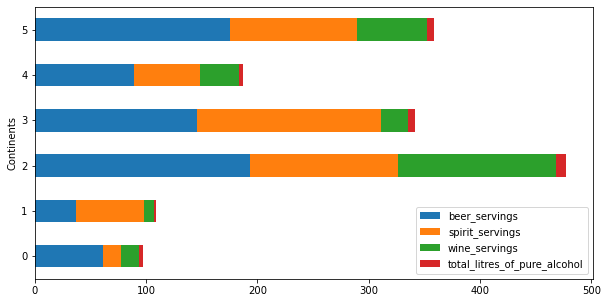

In [33]:
all_drinks.plot(kind='barh', stacked=True, figsize=(10, 5), xlabel='Test', ylabel='Sample')